<a href="https://colab.research.google.com/github/01Sagar10/Project/blob/main/Movie_recommendation_self.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement 1:-

Create a popularity based recommender system at a genre level.
User will input a genre (g), minimum ratings threshold (t) for a movie and no. of recommendations(N) for which it should be recommended top N movies
which are most popular within that genre (g) ordered by ratings in descending
order where each movie has at least (t) reviews

Genre (g) : Comedy

Minimum reviews threshold (t) : 100

Num recommendations (N) : 5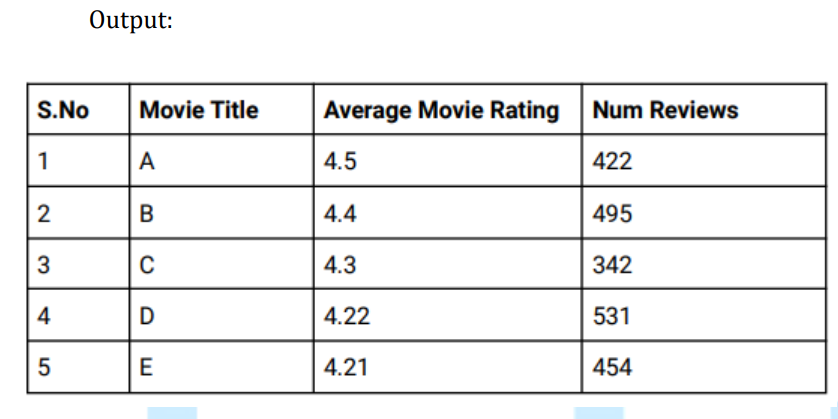

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
#from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors
#from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Edu Midterm Movie/movies.csv')
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [ ]:
df['genres'].value_counts()

genres
Drama                                        1385
Comedy                                        826
Comedy|Drama                                  465
Drama|Romance                                 421
Comedy|Romance                                363
                                             ... 
Animation|Children|Comedy|Musical|Western       1
Action|Adventure|Children|Comedy|Mystery        1
Action|Comedy|Crime|Drama|Horror|Thriller       1
Adventure|Drama|Romance|Thriller|War            1
Action|Fantasy|Mystery                          1
Name: count, Length: 938, dtype: int64

In [ ]:
#seperate the columns genres with delimeter Adventure|Animation|Children|Comedy|Fantasy

df['genres'] = df['genres'].astype(str)
df['genres'] = df['genres'].str.split("|")
df

#converterd all entries into a list

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),"[Animation, Children, Comedy]"
10325,146878,Le Grand Restaurant (1966),[Comedy]
10326,148238,A Very Murray Christmas (2015),[Comedy]
10327,148626,The Big Short (2015),[Drama]


In [ ]:
#to do one hot encoding for lists as entries in a column

#from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
df_genres = pd.DataFrame(mlb.fit_transform(df['genres']), columns=mlb.classes_, index=df.index )
df_genres

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10324,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10325,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10326,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10327,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_movie_hot = pd.concat([df, df_genres], axis=1)
df_movie_hot.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),[Comedy],0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_movie_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movieId             10329 non-null  int64 
 1   title               10329 non-null  object
 2   genres              10329 non-null  object
 3   (no genres listed)  10329 non-null  int64 
 4   Action              10329 non-null  int64 
 5   Adventure           10329 non-null  int64 
 6   Animation           10329 non-null  int64 
 7   Children            10329 non-null  int64 
 8   Comedy              10329 non-null  int64 
 9   Crime               10329 non-null  int64 
 10  Documentary         10329 non-null  int64 
 11  Drama               10329 non-null  int64 
 12  Fantasy             10329 non-null  int64 
 13  Film-Noir           10329 non-null  int64 
 14  Horror              10329 non-null  int64 
 15  IMAX                10329 non-null  int64 
 16  Musical             10

In [ ]:
df_movie_hot.drop('genres', axis = 1, inplace = True)
df_movie_hot.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_rating = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Edu Midterm Movie/ratings.csv')
df_rating.sort_values('movieId', inplace = True)
df_rating.head()

,userId,movieId,rating,timestamp
19960,158,1,4.5,1241296244
76418,536,1,3.0,860417689
76243,534,1,4.0,916850069
76000,532,1,3.0,1440345516
75826,531,1,5.0,1447661542


In [ ]:
dfr_count = df_rating.copy()

In [ ]:
dfr_count.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
#making a column for average rating of each movie
dfr_count['avg_rating'] = dfr_count.groupby('movieId')['rating'].transform('mean')
dfr_count.head()

,userId,movieId,rating,timestamp,avg_rating
19960,158,1,4.5,1241296244,3.907328
76418,536,1,3.0,860417689,3.907328
76243,534,1,4.0,916850069,3.907328
76000,532,1,3.0,1440345516,3.907328
75826,531,1,5.0,1447661542,3.907328


In [ ]:
#storing number of entries of movieId in a column

total_rating_count  = dfr_count['movieId'].value_counts()
dfr_count['Total rating count'] = dfr_count['movieId'].map(total_rating_count)
#dfr.drop('rating_count', axis =1, inplace = True)

dfr_count.head()

,userId,movieId,rating,timestamp,avg_rating,Total rating count
19960,158,1,4.5,1241296244,3.907328,232
76418,536,1,3.0,860417689,3.907328,232
76243,534,1,4.0,916850069,3.907328,232
76000,532,1,3.0,1440345516,3.907328,232
75826,531,1,5.0,1447661542,3.907328,232


In [ ]:
#making seperate variable for number of ratings of each movie ID
#pd.DataFrame(total_rating_count).sort_values('movieId')

In [ ]:
# dataframe of Movie rating, not respecting User ID
dfrc_no_u = dfr_count.drop_duplicates(subset = 'movieId', keep = 'first')
print(dfrc_no_u.sort_values(by = ['userId', 'movieId']).head())
dfrc_no_u.info()

     userId  movieId  rating   timestamp  avg_rating  Total rating count
54        1     1287     4.5  1217897783    4.062500                  48
70        1     2542     4.5  1217897667    3.986486                  74
100       1     8825     2.5  1217896490    2.500000                   1
196       3      532     3.0   841484049    3.478261                  23
245       4      940     5.0   950323317    4.000000                  24
<class 'pandas.core.frame.DataFrame'>
Index: 10325 entries, 19960 to 70604
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   userId              10325 non-null  int64  
 1   movieId             10325 non-null  int64  
 2   rating              10325 non-null  float64
 3   timestamp           10325 non-null  int64  
 4   avg_rating          10325 non-null  float64
 5   Total rating count  10325 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 564.6 KB


In [ ]:
dfrc_no_u.head()

,userId,movieId,rating,timestamp,avg_rating,Total rating count
19960,158,1,4.5,1241296244,3.907328,232
56917,410,2,3.0,1146174931,3.353261,92
33320,232,3,3.0,1277839361,3.189655,58
68404,465,4,1.5,1097880405,2.818182,11
11855,107,5,3.0,958161374,3.250000,62


In [ ]:
#making a variable in case avg_rating_count goes Nan after merging

avg_rating_count = dfr_count['avg_rating'].value_counts()
avg_rating_count # series

avg_rating
3.500000    2894
3.000000    2492
4.000000    2002
2.500000    1386
3.750000    1202
            ... 
0.800000       5
4.900000       5
4.625000       4
4.833333       3
0.833333       3
Name: count, Length: 1262, dtype: int64

In [ ]:
# setting index so no row gets mixed, deleted
dfrc_no_u = dfrc_no_u.set_index('movieId')
df_movie_hot = df_movie_hot.set_index('movieId')

In [ ]:
print(dfrc_no_u['avg_rating'].isnull().sum())

0


In [ ]:
#Dataframe for 1st problem statement
df_r_g_mov1= dfrc_no_u.merge(df_movie_hot, left_index=True, right_index=True, how='outer')
df_r_g_mov1.head()

,userId,rating,timestamp,avg_rating,Total rating count,title,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,158.0,4.5,1.241296e+09,3.907328,232.0,Toy Story (1995),0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,410.0,3.0,1.146175e+09,3.353261,92.0,Jumanji (1995),0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,232.0,3.0,1.277839e+09,3.189655,58.0,Grumpier Old Men (1995),0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,465.0,1.5,1.097880e+09,2.818182,11.0,Waiting to Exhale (1995),0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,107.0,3.0,9.581614e+08,3.250000,62.0,Father of the Bride Part II (1995),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_r_g_mov1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10329 entries, 1 to 149532
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   userId              10325 non-null  float64
 1   rating              10325 non-null  float64
 2   timestamp           10325 non-null  float64
 3   avg_rating          10325 non-null  float64
 4   Total rating count  10325 non-null  float64
 5   title               10329 non-null  object 
 6   (no genres listed)  10329 non-null  int64  
 7   Action              10329 non-null  int64  
 8   Adventure           10329 non-null  int64  
 9   Animation           10329 non-null  int64  
 10  Children            10329 non-null  int64  
 11  Comedy              10329 non-null  int64  
 12  Crime               10329 non-null  int64  
 13  Documentary         10329 non-null  int64  
 14  Drama               10329 non-null  int64  
 15  Fantasy             10329 non-null  int64  
 16  Film-Noi

Output1:-

Problem Statement 1:-

Create a popularity based recommender system at a genre level. User will input a genre (g), minimum ratings threshold (t) for a movie and no. of recommendations(N) for which it should be recommended top N movies which are most popular within that genre (g) ordered by ratings in descending order where each movie has at least (t) reviews

In [ ]:
df_popular = df_r_g_mov1.drop('userId', axis = 1)
df_popular.head()

,rating,timestamp,avg_rating,Total rating count,title,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.5,1.241296e+09,3.907328,232.0,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1.146175e+09,3.353261,92.0,Jumanji (1995),0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1.277839e+09,3.189655,58.0,Grumpier Old Men (1995),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1.5,1.097880e+09,2.818182,11.0,Waiting to Exhale (1995),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,3.0,9.581614e+08,3.250000,62.0,Father of the Bride Part II (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mlb.classes_

array(['(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'], dtype=object)

Solution:- PROBLEM STATEMENT 1

Create a popularity based recommender system at a genre level.

User will input a genre (g),

minimum count of total ratings threshold (t) for a movie and

no. of recommendations(N)

for which it should be recommended top N movies which are most popular (highest avg_rating) within that genre (g) ordered by ratings in descending order where each movie has at least (t) reviews

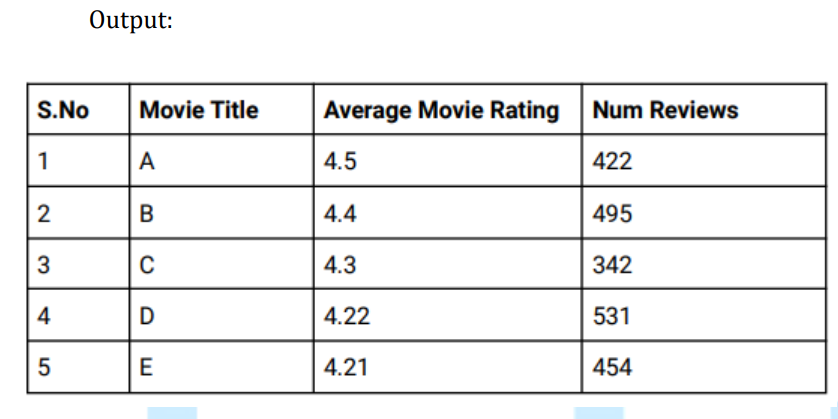



In [ ]:
# logic of problem statement 1
print('Genres List ',mlb.classes_)
g = input('Type Genre :').strip().title()
t = int(input("Minimum number of Reviews :"))
N = int(input("Number of recommendations you want :"))

recommended_table = pd.DataFrame()

if g in mlb.classes_:
  recommended_table = df_popular[df_popular[g] == 1]
  recommended_table = recommended_table.sort_values(by = ['avg_rating'], ascending = False)
  recommended_table = recommended_table[recommended_table['Total rating count'] >= t]
  if recommended_table.empty:
    print(f"No movies found for genre '{g}' with at least {t} reviews.")
  else:
    # Sort by average rating in descending order
    recommended_table = recommended_table.sort_values(by = ['avg_rating'], ascending = False)

    # Select top N movies
    recommended_table = recommended_table.head(N)
    #recommended_table.to_csv(f'recommended_table1{g}.csv')
# Prepare the recommendation table
    rc_table = {
            'Sr.No': range(1, len(recommended_table) + 1),
            'Movie Title': recommended_table['title'],
            'Average Movie Rating': recommended_table['avg_rating'],
            'Num Reviews': recommended_table['Total rating count']
        }

    rc_table_df = pd.DataFrame(rc_table).reset_index()
    rc_table_df.drop('movieId', axis = 1, inplace = True)
    #rc_table_df.drop('index', axis = 1, inplace = True)
    rc_table_df.set_index('Sr.No', inplace = True)
    #rc_table_df.to_csv(f'recommended_table1{g}.csv')

else:
  print('Genre not found')

rc_table_df

Genres List  ['(no genres listed)' 'Action' 'Adventure' 'Animation' 'Children' 'Comedy'
 'Crime' 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'IMAX'
 'Musical' 'Mystery' 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']
Type Genre :Action
Minimum number of Reviews :50
Number of recommendations you want :5


,Movie Title,Average Movie Rating,Num Reviews
Sr.No,,,
1,Princess Mononoke (Mononoke-hime) (1997),4.384615,52.0
2,North by Northwest (1959),4.273973,73.0
3,"Matrix, The (1999)",4.264368,261.0
4,Star Wars: Episode V - The Empire Strikes Back...,4.228070,228.0
5,Seven Samurai (Shichinin no samurai) (1954),4.217742,62.0


Problem Statement 2:

Create a content based recommender system which recommends top N movies
based on similar movie(m) genres.
Example:
Input:
Movie Title (t) : Toy Story
Num recommendations (N) : 5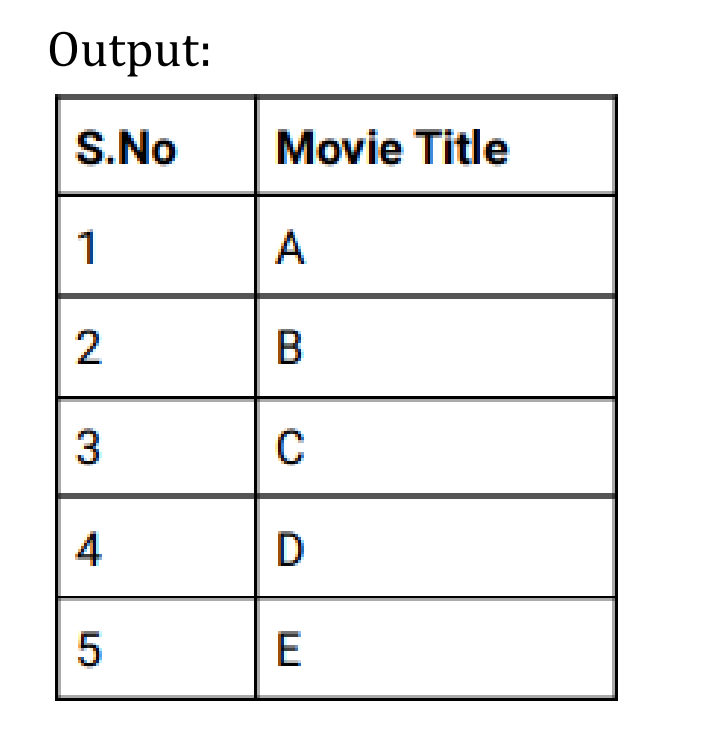

In [ ]:
"""Problem 2:-
Create a content based recommender system which recommends top N movies based on similar movie(m) genres.
Example: Input: Movie Title (t) : Toy Story Num recommendations (N) : 5 """

#print(df_popular['title'])
T = input('Name movie for search :').strip().title()
N = int(input('Number of recommendations'))

if T in df_popular['title'].values:
  movie_row = df_popular[df_popular['title'] == T] # all cols of movie title T
  #print('movie_row', movie_row)
  genre_cols = df_popular.columns[6:] # genre columns start from 6
  genres_of_movie = genre_cols[(movie_row[genre_cols]==1).values[0]]

  """movie_row[genre_cols] gives a DataFrame with only the genre columns for the movie.
  (movie_row[genre_cols] == 1) returns a DataFrame of the same shape, but with True where the genre value is 1 and False otherwise.
  .values converts this boolean DataFrame to a NumPy array.
  values[0] extracts the first (and only) row of this array, which is a 1-dimensional boolean array.
  genre_cols[...] uses this boolean array to filter the columns."""

  print("Movie_row with genre cols", genres_of_movie.tolist())

  # Filter movies that have at least one of the same genres
  filtered_movies = df_popular[df_popular[genres_of_movie].sum(axis=1) > 0]

  # Count the number of matching genres for each movie
  filtered_movies['matching_genres_count'] = filtered_movies[genres_of_movie].sum(axis=1)

  # Sort movies by the number of matching genres in descending order
  sorted_movies = filtered_movies.sort_values(by='matching_genres_count', ascending=False)

  # Get the titles of these movies
  similar_genre_movies = sorted_movies[['title', 'matching_genres_count', 'avg_rating']].reset_index(drop=True)
  similar_genre_movies1 = similar_genre_movies.head(N).sort_values(by = 'avg_rating', ascending = False).reset_index(drop = True)


  print(f"Movies with similar genres to '{T}':")
 # print("Similar movies \n ", similar_genre_movies )
  #print(f"Similar movie N \n ", similar_genre_movies1)


table2_ = {"Sr.No" : range(1, len(similar_genre_movies1) + 1),
           "Movie Title" :similar_genre_movies1['title']}
df_table2 = pd.DataFrame(table2_).set_index('Sr.No')
df_table2

Name movie for search :Jumanji (1995)
Number of recommendations5
Movie_row with genre cols ['Adventure', 'Children', 'Fantasy']
Movies with similar genres to 'Jumanji (1995)':


,Movie Title
Sr.No,
1,Toy Story (1995)
2,"Borrowers, The (1997)"
3,Antz (1998)
4,"Adventures of Sharkboy and Lavagirl 3-D, The (..."
5,Star Kid (1997)


Problem Statement :- 3.1

Create a collaborative based recommender system which recommends top N
movies based on “K” similar users for a target user “u”
Example:

Input:
x`
UserID : 1

Num recommendations(N) : 5

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Edu Midterm Movie/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Edu Midterm Movie/ratings.csv')

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [ ]:
data = pd.merge(ratings, movies, on = 'movieId')

In [ ]:
data.sort_values(by = 'movieId')

,userId,movieId,rating,timestamp,title,genres
14238,89,1,4.0,1328925149,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
14322,331,1,2.0,1138985654,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
14323,335,1,5.0,1308170571,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
14324,336,1,4.0,1248028572,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
14325,337,1,3.0,962607484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
102368,475,148238,3.0,1451213043,A Very Murray Christmas (2015),Comedy
101833,668,148626,4.5,1451148148,The Big Short (2015),Drama
101832,576,148626,4.5,1451687664,The Big Short (2015),Drama
101831,458,148626,4.0,1452014749,The Big Short (2015),Drama


In [ ]:
# this reduces rows of userID to one row each, without reducing that user ID's total all ratings for movies
#user_item_matrix = data.pivot_table(index='userId', columns='title', values='rating').fillna(0)

user_item_matrix = data.pivot_table(columns = 'title', index = 'userId', values = 'rating' )

user_item_matrix = user_item_matrix.fillna(0)

In [ ]:
user_item_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_item_matrix_T = user_item_matrix.T
user_item_matrix_T

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loudQUIETloud: A Film About the Pixies (2006),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
xXx: State of the Union (2005),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#gridsearch needs scoring param, instead, a forloop

from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Define the parameter grid
param_grid = {
    'n_neighbors': [5, 10, 15, 20],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

# Split the data into a training set and a validation set
train_matrix, test_matrix = train_test_split(user_item_matrix, test_size=0.2, random_state=42)

best_params = None
best_score = float('inf')

for n_neighbors in param_grid['n_neighbors']:
    for metric in param_grid['metric']:
        # Initialize the NearestNeighbors model
        knn = NearestNeighbors(n_neighbors=n_neighbors, metric=metric)

        # Fit the model on the training data
        knn.fit(train_matrix)

        # Evaluate the model on the test data
        distances = knn.kneighbors(test_matrix)
        avg_distance = np.mean(distances)

        # Update best parameters if the current model is better
        if avg_distance < best_score:
            best_score = avg_distance
            best_params = {'n_neighbors': n_neighbors, 'metric': metric}

print("Best parameters found: ", best_params)


Best parameters found:  {'n_neighbors': 20, 'metric': 'cosine'}


In [ ]:
kmn = NearestNeighbors(n_neighbors= 20, metric = 'cosine', algorithm = 'auto')
knn.fit(user_item_matrix_T)

NearestNeighbors(metric='cosine', n_neighbors=20)

In [ ]:
def recommend_movies(movie_name, n_recommendations):
    # Get the index of the movie that matches the title
    movie_idx = user_item_matrix_T.index.get_loc(movie_name)

    # Get the distances and indices of the nearest neighbors
    distances, indices = knn.kneighbors(user_item_matrix_T.iloc[movie_idx, :].values.reshape(1, -1), n_neighbors=n_recommendations + 1)

    # Convert distances and indices to lists
    distances = distances.flatten().tolist()
    indices = indices.flatten().tolist()
    print(distances)
    print(indices)


    # Get the recommended movie titles
    recommended_movie_titles = [user_item_matrix_T.index[i] for i in indices if i != movie_idx]

    return recommended_movie_titles


In [ ]:

movie_to_recommend = input().strip().title()#"Toy Story (1995)"  # Change this to the movie you want recommendations for
recommendations = recommend_movies(movie_to_recommend, int(input("Number of recommendations you want :")))  # Change the number of recommendations if needed

print(f"Recommendations for {movie_to_recommend}:")

#create a list to store the recommendation data
recommendations_data = []
for i, rec in enumerate(recommendations):
  recommendations_data.append({"Sr.No": i+1, "Movie Title": rec})

table_3 = pd.DataFrame(recommendations_data).set_index("Sr.No")

table_3


Jumanji (1995)
Number of recommendations you want :5
[2.220446049250313e-16, 0.486421321490521, 0.5140620905839879, 0.5383573784777849, 0.5399688729742714, 0.5492000557726444]
[4918, 5405, 4224, 6227, 5857, 8488]
Recommendations for Jumanji (1995):


,Movie Title
Sr.No,
1,"Lion King, The (1994)"
2,Home Alone (1990)
3,Mrs. Doubtfire (1993)
4,"Mask, The (1994)"
5,Speed (1994)


# **Problem 3.2**

Recommendations:- where input 'Cluster_number' based on User_IDs clusters

In [ ]:
user_item_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

n_neighbors = 20
knn = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
knn.fit(user_item_matrix)

# Find the neighbors for each user
distances, indices = knn.kneighbors(user_item_matrix)

# Create a dictionary to map cluster names to user IDs
cluster_dict = {}
for i, neighbors in enumerate(indices):
    cluster_dict[f'Cluster_{i+1}'] = user_item_matrix.index[neighbors].tolist()

print(cluster_dict.keys())

def get_cluster_recommendations(cluster_name, n_recommendations):
    user_indices = cluster_dict[cluster_name]

    # Get the subset of the user-item matrix for users in the specified cluster
    cluster_matrix = user_item_matrix.loc[user_indices]

    # Calculate the average rating for each movie across all users in the cluster
    avg_ratings = cluster_matrix.mean(axis=0)

    # Get the top N recommended movies based on the highest average ratings
    recommended_movies = avg_ratings.nlargest(n_recommendations).index.tolist()
    recommended_movies_df = pd.DataFrame(recommended_movies)
    recommended_movies_df.columns = ['Title']
    print(recommended_movies_df.columns.values[0])

    return recommended_movies_df


# Example usage
cluster_name = input("Neighbor name (e.g., 'Cluster_1'): ")
n_recommendations = int(input("Number of recommendations: "))

recommendations = get_cluster_recommendations(cluster_name, n_recommendations)
print("Recommended movies:")
print(recommendations)

dict_keys(['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7', 'Cluster_8', 'Cluster_9', 'Cluster_10', 'Cluster_11', 'Cluster_12', 'Cluster_13', 'Cluster_14', 'Cluster_15', 'Cluster_16', 'Cluster_17', 'Cluster_18', 'Cluster_19', 'Cluster_20', 'Cluster_21', 'Cluster_22', 'Cluster_23', 'Cluster_24', 'Cluster_25', 'Cluster_26', 'Cluster_27', 'Cluster_28', 'Cluster_29', 'Cluster_30', 'Cluster_31', 'Cluster_32', 'Cluster_33', 'Cluster_34', 'Cluster_35', 'Cluster_36', 'Cluster_37', 'Cluster_38', 'Cluster_39', 'Cluster_40', 'Cluster_41', 'Cluster_42', 'Cluster_43', 'Cluster_44', 'Cluster_45', 'Cluster_46', 'Cluster_47', 'Cluster_48', 'Cluster_49', 'Cluster_50', 'Cluster_51', 'Cluster_52', 'Cluster_53', 'Cluster_54', 'Cluster_55', 'Cluster_56', 'Cluster_57', 'Cluster_58', 'Cluster_59', 'Cluster_60', 'Cluster_61', 'Cluster_62', 'Cluster_63', 'Cluster_64', 'Cluster_65', 'Cluster_66', 'Cluster_67', 'Cluster_68', 'Cluster_69', 'Cluster_70', 'Cluster_71', 'Clu